In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv


**Most Important thing to do in a model is to get to know your data!!**

*     Understand the Question or problem definition properly.
    
*     Acquire the knowledge of training and testing data, make sure you know what a particular column is doing here.
    
*     Work to Improve data.. Do Data Wrangling, prepare, and cleanse the data.
    
*     Do EDA, or Analyze, identify patterns, and explore the data. [ This can give you some insights!! ]
    
*     Model, predict and solve the problem.
    
*     Do MEtric Evaluations and Visualize, report, and present the final solution.

In [2]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, StratifiedKFold, RandomizedSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score, accuracy_score, make_scorer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from xgboost import XGBClassifier, plot_importance as plot_importance_xgb

# Deep Learning

import torch 
import torchvision as tv 

In [3]:
train_df = pd.read_csv('../input/titanic/train.csv')
test_df = pd.read_csv('../input/titanic/test.csv')
combine = [train_df, test_df]
train_df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [4]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Let's Understand what each feature is doing..


**survival**: Survival (0 = No, 1 = Yes)

**pclass**:	Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)

**sibsp**: # of siblings / spouses aboard the Titanic 	

**parch**: 	# of parents / children aboard the Titanic 	

**ticket**: Ticket number 	

**cabin**: 	Cabin number 	

**embarked**: 	Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

In [5]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger



Which features are categorical?

    Categorical: Survived, Sex, and Embarked. Ordinal: Pclass.

Which features are numerical?

    Continous: Age, Fare. Discrete: SibSp, Parch.



### We will do Visualization and Correlation tests to answer questions like:

    1. Which feature is responsible for the target

    2. What is the distribution of numerical feature values across the samples?
    
    3. What anomaly do we observe in the data, any imbalance? Outliers? Skewness? and so on...
    
    4. Is data Linear or Is there multi collinearity?
    
    5. Are the Features Significant?
    
There are bunch of more questions and we will see all of that over time!!

This helps us determine, among other early insights, how representative is the training dataset of the actual problem domain.

In [6]:
train_df.describe(include=['O'])

Name   Sex  Ticket Cabin Embarked
count                         891   891     891   204      889
unique                        891     2     681   147        3
top     Stahelin-Maeglin, Dr. Max  male  347082    G6        S
freq                            1   577       7     4      644

In [7]:
train_df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [8]:
test_df.Sex.value_counts()

male      266
female    152
Name: Sex, dtype: int64

## 5 Step Brief RoadMap

1. Understand Columns.
    Know what a column/feature is doing in the data. What type it is, how much is null, what is intuitive role of feature? Is it Significant?


2. Visualize.

    1. We may want to complete Age feature as it is definitely correlated to survival.
    2. We may want to complete the Embarked feature as it may also correlate with survival or another important feature.


3. Complete incomplete Variables or drop or Create new features using Old. Basically Feature Engineering.

    1. Ticket feature may be dropped from our analysis as it contains high ratio of duplicates (22%) and there may not be a correlation between Ticket and survival.
    2. Cabin feature may be dropped as it is highly incomplete or contains many null values both in training and test dataset.
    3. PassengerId may be dropped from training dataset as it does not contribute to survival.
    4. Name feature is relatively non-standard, may not contribute directly to survival, so maybe dropped.
    
    5. We may want to create a new feature called Family based on Parch and SibSp to get total count of family members on board.
    6. We may want to engineer the Name feature to extract Title as a new feature.
    7. We may want to create new feature for Age bands. This turns a continous numerical feature into an ordinal categorical feature.
    8. We may also want to create a Fare range feature if it helps our analysis.
    

4. Look at correlations btw variables and fix problems like MultiCollinearity.

     We want to know how well does each feature correlate with Survival. We want to do this early in our project and match these quick correlations with modelled correlations later in the project.


5. Classifying.

    1. We may also add to our assumptions based on the problem description noted earlier.
    2. Women (Sex=female) were more likely to have survived.
    3. Children (Age<?) were more likely to have survived.
    4. The upper-class passengers (Pclass=1) were more likely to have survived.


Cross-Validation, Gridsearch CV are really good to select good model in ML, and we'll do that only!!


# Let's Understand more about Columns and also check the correlation to Independent Variable

In [9]:
cat_cols = ['Pclass','Parch','Sex','SibSp','Cabin','Embarked']
for i in cat_cols:
    print(train_df[[i, 'Survived']].groupby([i], as_index=False).mean().sort_values(by='Survived', ascending=False))
    print('-'*50)
    print('\n')
    
    
# Pclass seems like an important feature to predict survival as PClass 1 means more survived!!
# Female survived more!!
# SibSp and Parch These features have zero correlation for certain values. It may be best to derive a feature or a set of features from these individual features (creating #1).


   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
--------------------------------------------------


   Parch  Survived
3      3  0.600000
1      1  0.550847
2      2  0.500000
0      0  0.343658
5      5  0.200000
4      4  0.000000
6      6  0.000000
--------------------------------------------------


      Sex  Survived
0  female  0.742038
1    male  0.188908
--------------------------------------------------


   SibSp  Survived
1      1  0.535885
2      2  0.464286
0      0  0.345395
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
--------------------------------------------------


       Cabin  Survived
73   C62 C64       1.0
97       D21       1.0
94       D17       1.0
95       D19       1.0
60      C148       1.0
..       ...       ...
67       C46       0.0
64       C30       0.0
59      C128       0.0
56      C124       0.0
146        T       0.0

[147 rows x 2 columns]
--------------------------------------------

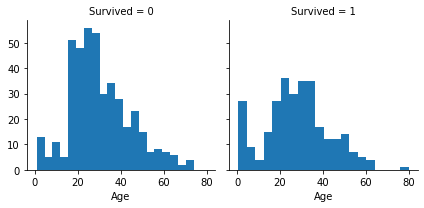

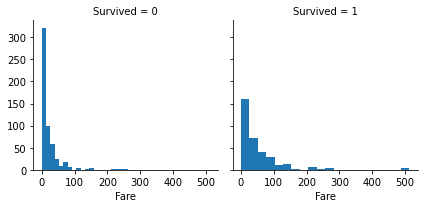

In [10]:
# check Reltn btw cont and Class

for i in ['Age','Fare']:
    g = sns.FacetGrid(train_df, col='Survived')
    g.map(plt.hist, i , bins=20)

# Let's do some Visualization

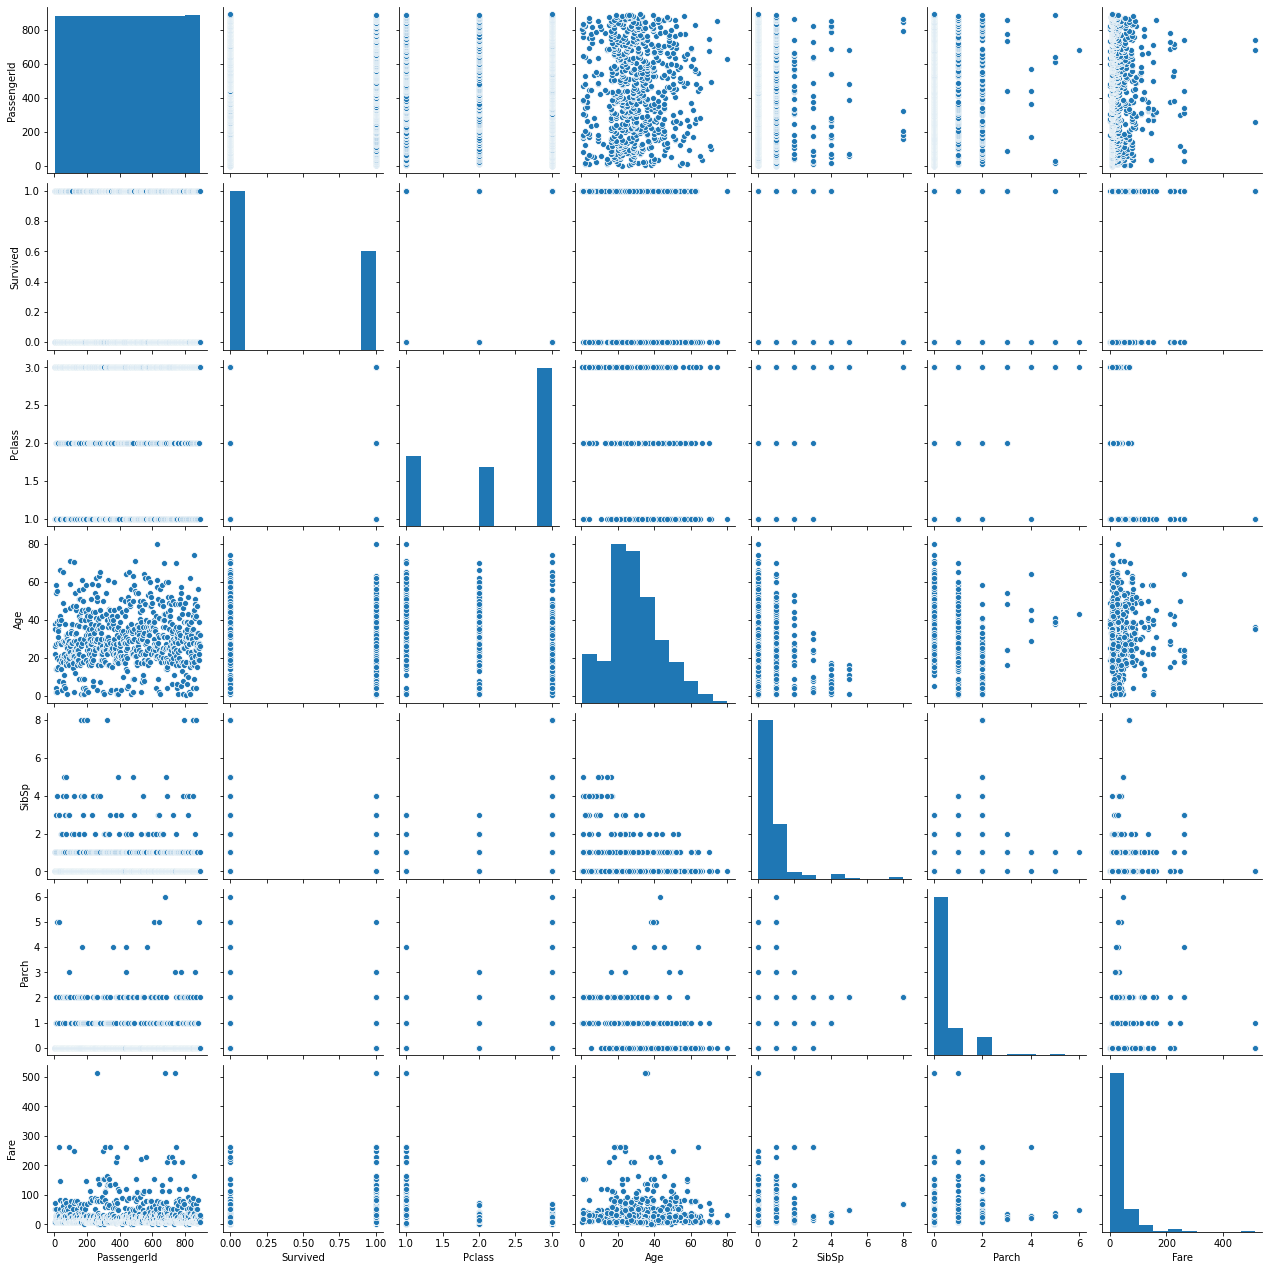

In [11]:
sns.pairplot(train_df)


What is the distribution of categorical features?

*     Names are unique across the dataset (count=unique=891)
*     Sex variable as two possible values with 65% male (top=male, freq=577/count=891).
*     Cabin values have several dupicates across samples. Alternatively several passengers shared a cabin.
*     Embarked takes three possible values. S port used by most passengers (top=S)
*     Ticket feature has high ratio (22%) of duplicate values (unique=681).


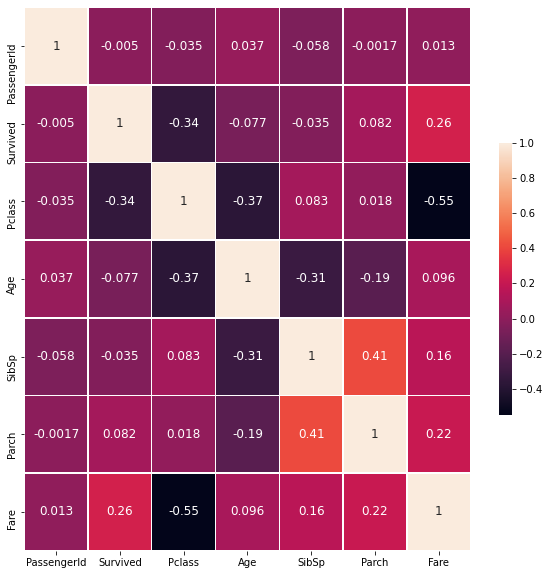

In [12]:
fig, ax = plt.subplots(figsize=(10, 10))
corr = train_df.corr()
sns.heatmap(corr, linewidths=.5, cbar_kws={"shrink": .5},annot_kws={'fontsize':12 },annot=True,)

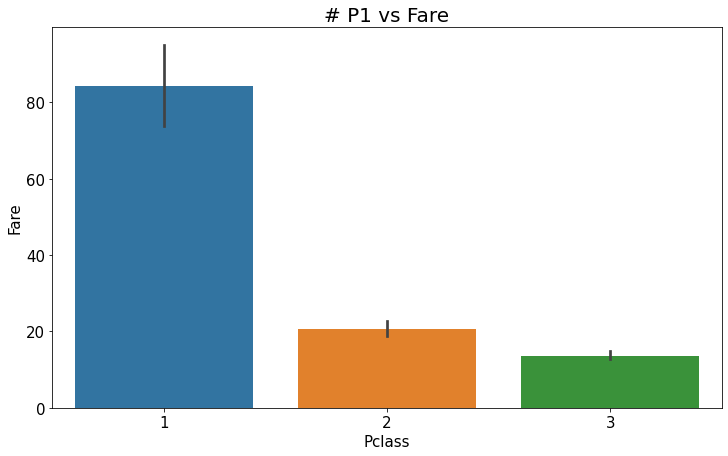

In [13]:
fig, ax = plt.subplots(figsize=(12, 7))

sns.barplot(x = train_df['Pclass'],y = train_df['Fare'])
plt.title('# P1 vs Fare', size=20)
plt.xlabel('Pclass', size=15)
plt.ylabel('Fare', size=15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

# a Clear -ve correlation... but does this correlation matters? because Pclass is a category not numeric!!

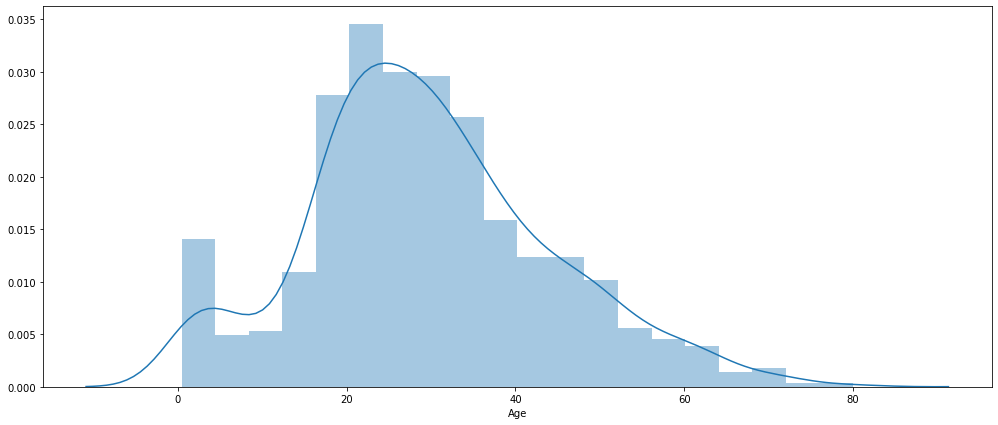

In [14]:
fig, ax = plt.subplots(figsize=(17, 7))
sns.distplot(train_df['Age'].dropna())

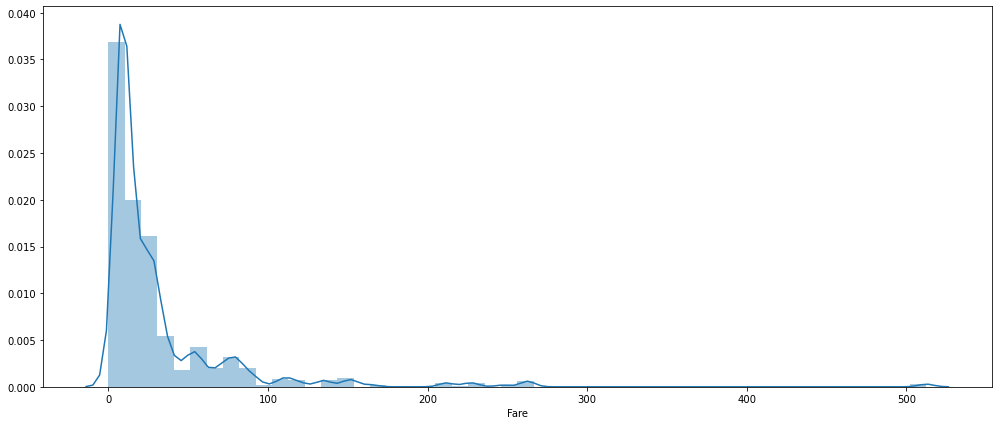

In [15]:
fig, ax = plt.subplots(figsize=(17, 7))
sns.distplot(train_df['Fare'].dropna())

In [16]:
import pandas_profiling # library for automatic EDA
report = pandas_profiling.ProfileReport(train_df)

In [17]:
display(report)

/opt/conda/lib/python3.7/site-packages/IPython/core/display.py:701: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [18]:
!pip install autoviz 

from autoviz.AutoViz_Class import AutoViz_Class
from IPython.display import display # display from IPython.display

AV = AutoViz_Class()

Imported AutoViz_Class version: 0.0.68. Call using: 
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
            
To remove previous versions, perform 'pip uninstall autoviz'


Shape of your Data Set: (891, 12)
Classifying variables in data set...
    12 Predictors classified...
        This does not include the Target column(s)
    4 variables removed since they were ID or low-information variables
Number of All Scatter Plots = 3
Time to run AutoViz (in seconds) = 1.664


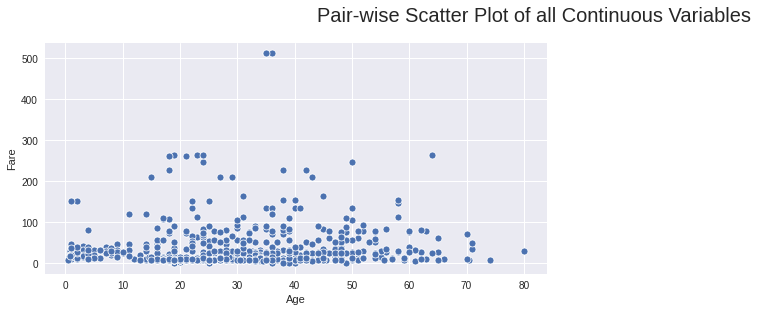

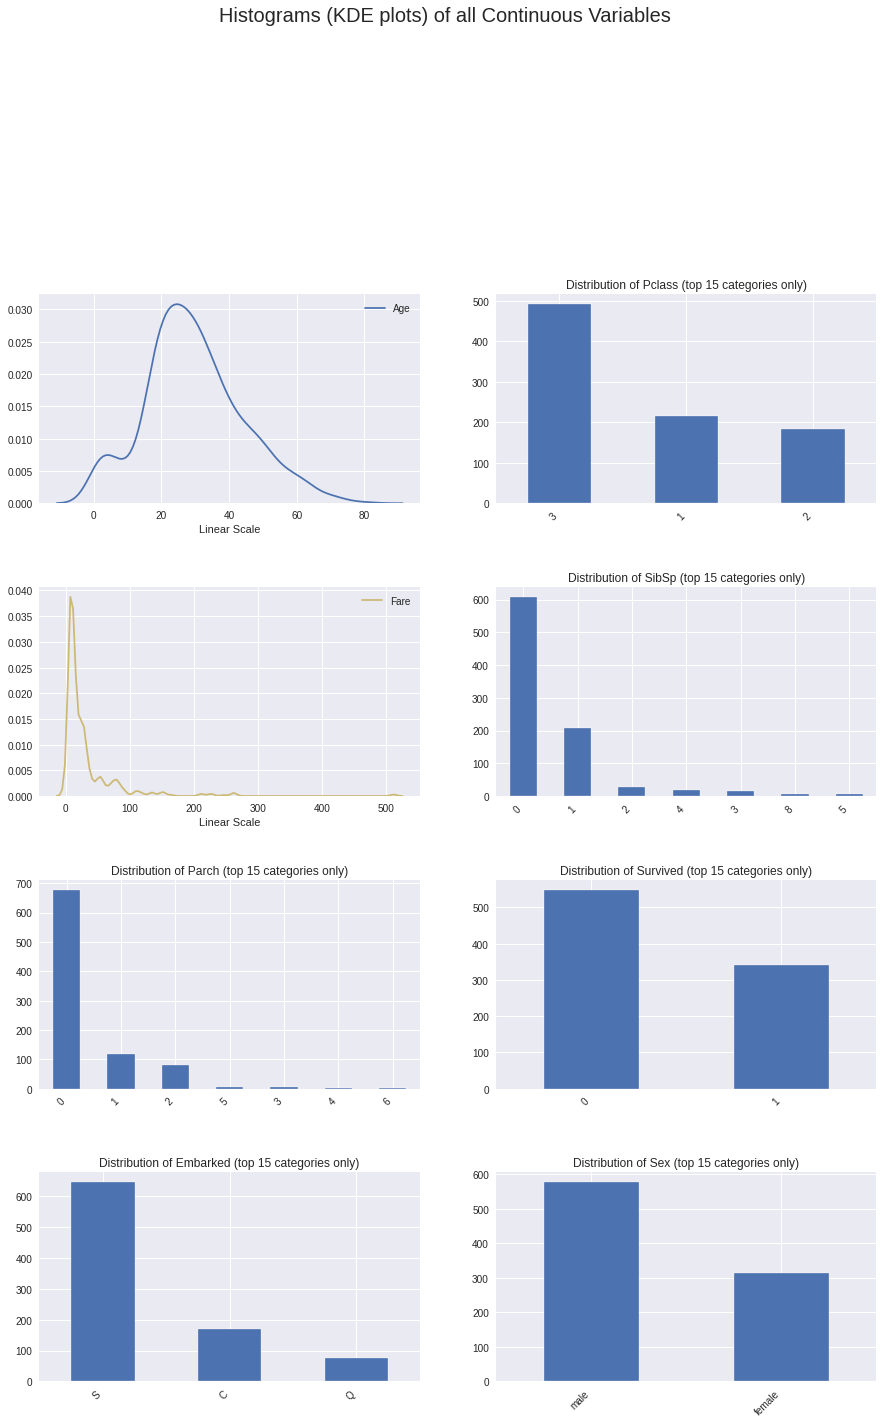

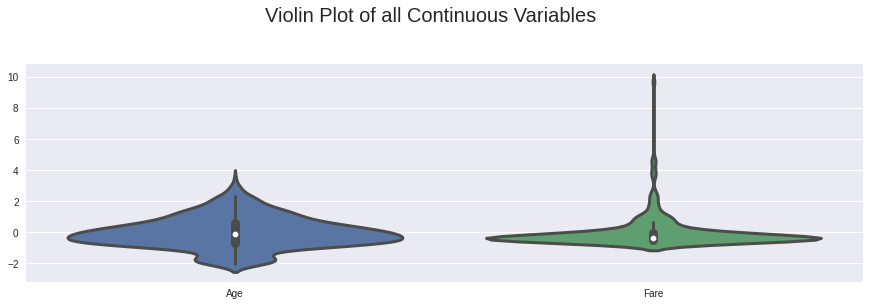

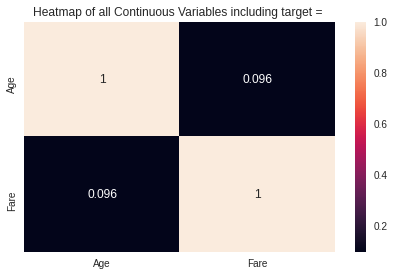

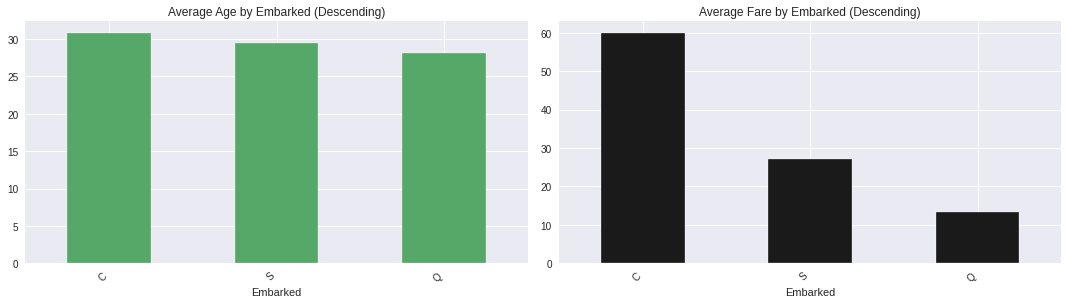

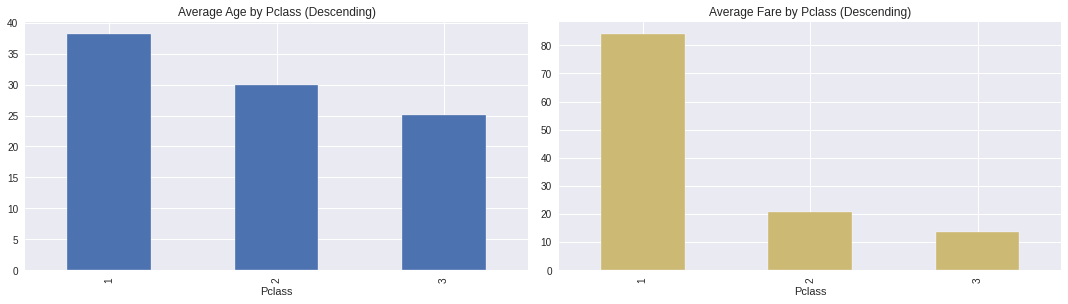

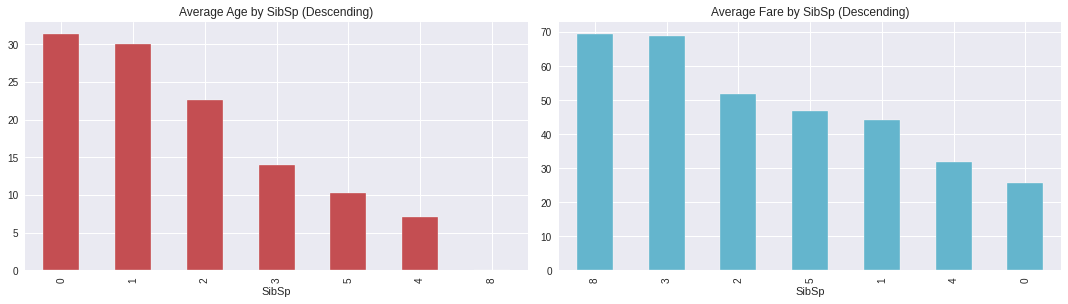

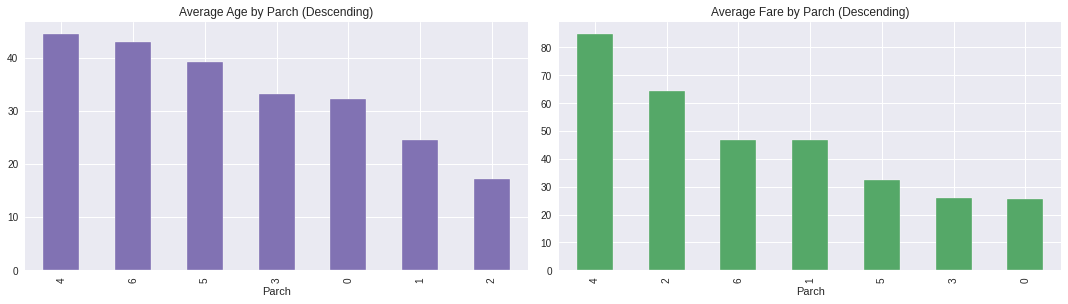

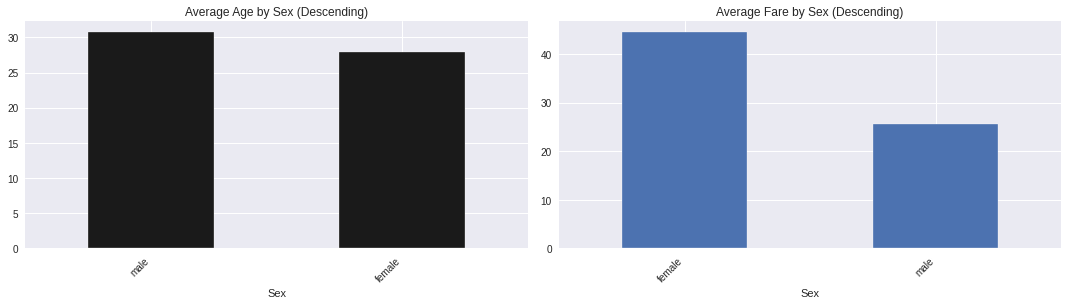

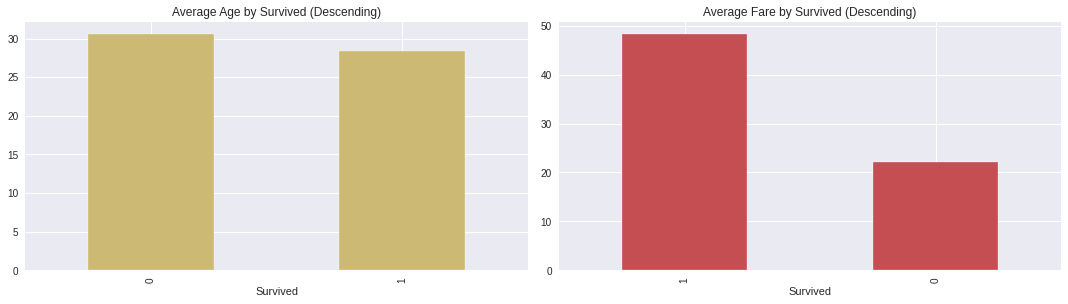

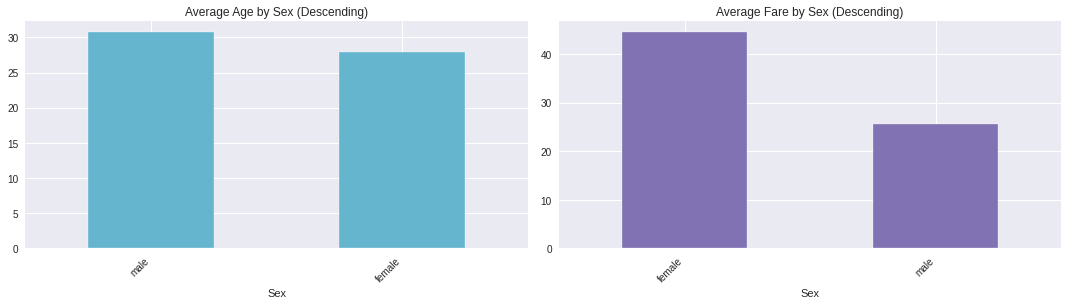

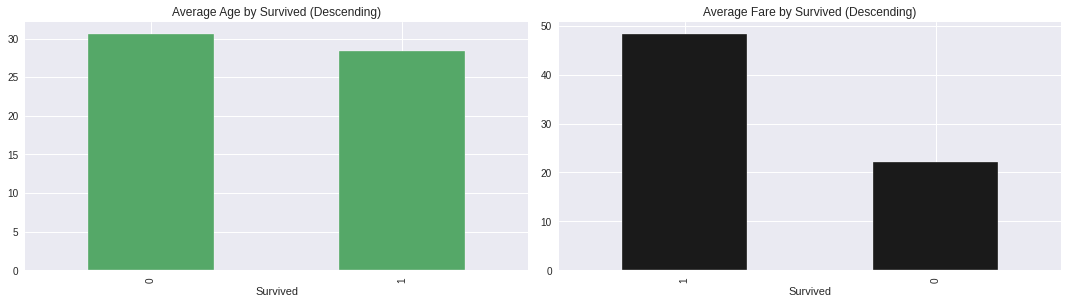

In [19]:
# Let's now visualize the plots generated by AutoViz.
report_2 = AV.AutoViz("/kaggle/input/titanic/train.csv")

**We have got hell lot of Information from Pandas Profiling and AutoViz, Let's make some Hypothesis and do Feature Engineering**

In [20]:
print("{} \nNan values found".format(train_df.isna().sum()))
print("{} \nNan values found".format(test_df.isna().sum()))

# train_df.dropna(inplace=True) # drop na

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64 
Nan values found
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64 
Nan values found


## WAIT!!


# Looking for 100 Data Science Interview Questions?
## I've got you: *https://www.linkedin.com/posts/alaapdhall_day-7-of-100-data-science-interview-questions-activity-6712629560569069568-yQbn*

## If you're Interested in Deep Learning with PyTorch, visit https://www.aiunquote.com for 100 project in Deep Learning Series!!

---

# Feature Engineering

In [21]:
train_df = pd.read_csv('../input/titanic/train.csv')
test_df = pd.read_csv('../input/titanic/test.csv')
combine = [train_df, test_df]
train_df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [22]:
train_df = train_df.drop(['PassengerId','Cabin','Ticket'], axis=1)
test_df = test_df.drop(['PassengerId','Cabin','Ticket'], axis=1)

#complete missing age with median
train_df['Age'].fillna(train_df['Age'].median(), inplace = True)
test_df['Age'].fillna(test_df['Age'].median(), inplace = True)

#complete embarked with mode
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace = True)

test_df['Fare'].fillna(test_df['Fare'].mode()[0], inplace = True)

train_df

Survived  Pclass                                               Name  \
0           0       3                            Braund, Mr. Owen Harris   
1           1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2           1       3                             Heikkinen, Miss. Laina   
3           1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4           0       3                           Allen, Mr. William Henry   
..        ...     ...                                                ...   
886         0       2                              Montvila, Rev. Juozas   
887         1       1                       Graham, Miss. Margaret Edith   
888         0       3           Johnston, Miss. Catherine Helen "Carrie"   
889         1       1                              Behr, Mr. Karl Howell   
890         0       3                                Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch     Fare Embarked  
0      male  22.0      1      0   7.2500        S  
1    female  38.0      1      0  71.2833        C  
2    female  26.0      0      0   7.9250        S  
3    female  35.0      1      0  53.1000        S  
4      male  35.0      0      0   8.0500        S  
..      ...   ...    ...    ...      ...      ...  
886    male  27.0      0      0  13.0000        S  
887  female  19.0      0      0  30.0000        S  
888  female  28.0      1      2  23.4500        S  
889    male  26.0      0      0  30.0000        C  
890    male  32.0      0      0   7.7500        Q  

[891 rows x 9 columns]

In [23]:
print("{} \nNan values found".format(train_df.isna().sum()))
print("{} \nNan values found".format(test_df.isna().sum()))

# train_df.dropna(inplace=True) # drop na

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64 
Nan values found
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64 
Nan values found


## Let's check pearson Correlation!
We remove any value with corr value above 0.85

In [24]:
from scipy.stats import pearsonr
    

# get if a variable is continous, 
# do some sanity check so onehotencoders are not affected
def get_continous(df):
    cont_cols = []
    for col in df.columns:
        try:
            df[col] = list(map(int,df[col])) # convert to int, eg '123' --> 123 and 'abc'--> 'ValueError'. Win win!!
            if set(df[col].unique())!={0,1}: # skip onehot values
                cont_cols.append(col)
        except ValueError:
            pass  
    return cont_cols

# we can use df.corr(method='pearson') to get pearson relation but this compromise the flexibility
# and in order to remove we had to pass though data again, 
# rather we calculate corr column by column and remove if feels necessary, flexible and faster

def find_pearson_cor(df):
    cont_cols = get_continous(df) # get cont values to reduce number of col search
    if cont_cols is not None:
        cnt = 0
        should_drop=[]
        for idx,i in enumerate(cont_cols):
            for j in cont_cols[idx+1:]: # go through columns and find corr
                corr, _ = pearsonr(df[i],df[j]) # use scipy
                print(i,"has corr value =",corr,"with",j)
                if corr > 0.85: 
                    cnt+=1
                    random_drop = random.randint(0,1) # randomly select 1 column with high corr value 
                    if random_drop==1:
                        should_drop.append(j)
#                         df.drop(j,axis=1,inplace = True) # drop it
                        print(j,"Should be dropped with corr = ",corr)
                    else:
                        should_drop.append(i)
#                         df.drop(i,axis=1,inplace = True) # drop it
                        print(i,"Should be dropped with corr = ",corr)
        if cnt==0:
            print("No columns are highly Correlated!!")
    else:
        print("no continous columns")

    return should_drop # return df


In [25]:
find_pearson_cor(train_df)

Pclass has corr value = -0.33999868128870414 with Age
Pclass has corr value = 0.08308136284568675 with SibSp
Pclass has corr value = 0.018442671310748542 with Parch
Pclass has corr value = -0.5505531056023296 with Fare
Age has corr value = -0.2330663417610274 with SibSp
Age has corr value = -0.17274506911937468 with Parch
Age has corr value = 0.09706415020701051 with Fare
SibSp has corr value = 0.41483769862015607 with Parch
SibSp has corr value = 0.15950564671453715 with Fare
Parch has corr value = 0.21625160259543152 with Fare
No columns are highly Correlated!!


[]

## LEt's Check for Outliers!
We can us z-test and other techniques but I'll use Box Plot to check for outliers!!

In [26]:
# get if a variable is continous, 
# do some sanity check so onehotencoders are not affected
def get_continous(df):
    cont_cols = []
    for col in df.columns:
        try:
            df[col] = list(map(int,df[col])) # convert to int, eg '123' --> 123 and 'abc'--> 'ValueError'. Win win!!
            if set(df[col].unique())!={0,1}: # skip onehot values
                cont_cols.append(col)
        except ValueError:
            pass
  
    return cont_cols

# 2 common ways to detect outliers, we will use IQR method cz I feel it works better in practical scenerios and is more flexible.
def detect_outliers(df,OUT_THRES=7):
    df_len = len(df)
    cont_cols = get_continous(df) # get cont values

    print("Variable with continues values",cont_cols)
  
    if cont_cols is not None:
        for i in cont_cols:
            # find outliers for every column thatis continous, this is why IQR is better than z as ir gives more flexibility
            Q1 = df[i].quantile(0.20)
            Q3 = df[i].quantile(0.80)
            IQR = Q3 - Q1
            # get bounds
            Lower_Bound = Q1-1.5*IQR
            Upper_Bound = Q3+1.5*IQR

            # get actual outlier values
            df_u = df[i]<Upper_Bound
            df_l = df[i]>Lower_Bound

            # Sanity check
            # If number of outliers is less than the given threshold, only remove then, otherwise let it be, it may be occuring naturally
            if df_len-sum(df_u)<=OUT_THRES:
                df = df[df_u]

            if df_len-sum(df_l)<=OUT_THRES:
                df = df[df_l]

            print("For {} removed {} outliers".format(i,df_len-len(df)))
            df_len = len(df)
    else:
        print('No Continous variables found')

    return df

In [27]:
print("Final df\n",detect_outliers(train_df))

Variable with continues values ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
For Pclass removed 0 outliers
For Age removed 0 outliers
For SibSp removed 0 outliers
For Parch removed 0 outliers
For Fare removed 0 outliers
Final df
      Survived  Pclass                                               Name  \
0           0       3                            Braund, Mr. Owen Harris   
1           1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2           1       3                             Heikkinen, Miss. Laina   
3           1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4           0       3                           Allen, Mr. William Henry   
..        ...     ...                                                ...   
886         0       2                              Montvila, Rev. Juozas   
887         1       1                       Graham, Miss. Margaret Edith   
888         0       3           Johnston, Miss. Catherine Helen "Carrie"   
889         

In [28]:
# Use SimpleImputer?

# from sklearn.impute import SimpleImputer

# imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
# imputer.fit(X[:, 3:4])
# X[:, 3:4] = imputer.transform(X[:, 3:4])

In [29]:
train_df['Sex'] = train_df['Sex'].map({'male':0,'female':1})
test_df['Sex'] = test_df['Sex'].map({'male':0,'female':1})

train_df

Survived  Pclass                                               Name  Sex  \
0           0       3                            Braund, Mr. Owen Harris    0   
1           1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1   
2           1       3                             Heikkinen, Miss. Laina    1   
3           1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1   
4           0       3                           Allen, Mr. William Henry    0   
..        ...     ...                                                ...  ...   
886         0       2                              Montvila, Rev. Juozas    0   
887         1       1                       Graham, Miss. Margaret Edith    1   
888         0       3           Johnston, Miss. Catherine Helen "Carrie"    1   
889         1       1                              Behr, Mr. Karl Howell    0   
890         0       3                                Dooley, Mr. Patrick    0   

     Age  SibSp  Parch  Fare Embarked  
0     22      1      0     7        S  
1     38      1      0    71        C  
2     26      0      0     7        S  
3     35      1      0    53        S  
4     35      0      0     8        S  
..   ...    ...    ...   ...      ...  
886   27      0      0    13        S  
887   19      0      0    30        S  
888   28      1      2    23        S  
889   26      0      0    30        C  
890   32      0      0     7        Q  

[891 rows x 9 columns]

In [30]:
# Encoding the Dependent Variable if needed

# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# y = le.fit_transform(y)
# print(y)

## We make new variable AgeBand and cut it to see how it relates to Survival

In [31]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
test_df['AgeBand'] = pd.cut(test_df['Age'], 5)

train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

AgeBand  Survived
0  (-0.08, 16.0]  0.550000
1   (16.0, 32.0]  0.344762
2   (32.0, 48.0]  0.403226
3   (48.0, 64.0]  0.434783
4   (64.0, 80.0]  0.090909

In [32]:
train_df['FareBin'] = pd.qcut(train_df['Fare'], 4)
test_df['FareBin'] = pd.qcut(test_df['Fare'], 4)

train_df[['FareBin', 'Survived']].groupby(['FareBin'], as_index=False).mean().sort_values(by='FareBin', ascending=True)

FareBin  Survived
0  (-0.001, 7.0]  0.215768
1    (7.0, 14.0]  0.287037
2   (14.0, 31.0]  0.457399
3  (31.0, 512.0]  0.597156

In [33]:
for dataset in [train_df,test_df]:

    """
    you could divide Age into bins like this based on the above observed formula, 
    but  using LabelEncoder is easier and works better thus, I'll follow that
    """
#     dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
#     dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
#     dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
#     dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
#     dataset.loc[ dataset['Age'] > 64, 'Age']
    
    
    # Creating a categorical variable for Family Sizes
    dataset['FamilySize'] = ''
    dataset['FamilySize'].loc[(dataset['SibSp'] <= 2)] = 0
    dataset['FamilySize'].loc[(dataset['SibSp'] > 2) & (dataset['SibSp'] <= 5 )] = 1
    dataset['FamilySize'].loc[(dataset['SibSp'] > 5)] = 2 


    # Creating a categorical variable to tell if the passenger is alone
    dataset['IsAlone'] = ''
    dataset['IsAlone'].loc[((dataset['SibSp'] + dataset['Parch']) > 0)] = 1
    dataset['IsAlone'].loc[((dataset['SibSp'] + dataset['Parch']) == 0)] = 0
    
    dataset['Title'] = dataset['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
    
    # take only top 10 titles
    title_names = (dataset['Title'].value_counts() < 10) #this will create a true false series with title name as index

    #apply and lambda functions are quick and dirty code to find and replace with fewer lines of code: https://community.modeanalytics.com/python/tutorial/pandas-groupby-and-python-lambda-functions/
    dataset['Title'] = dataset['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)
    print(dataset['Title'].value_counts())
    print("-"*10)
    

train_df.head()

Mr        517
Miss      182
Mrs       125
Master     40
Misc       27
Name: Title, dtype: int64
----------
Mr        240
Miss       78
Mrs        72
Master     21
Misc        7
Name: Title, dtype: int64
----------


Survived  Pclass                                               Name  Sex  \
0         0       3                            Braund, Mr. Owen Harris    0   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1   
2         1       3                             Heikkinen, Miss. Laina    1   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1   
4         0       3                           Allen, Mr. William Henry    0   

   Age  SibSp  Parch  Fare Embarked       AgeBand        FareBin FamilySize  \
0   22      1      0     7        S  (16.0, 32.0]  (-0.001, 7.0]          0   
1   38      1      0    71        C  (32.0, 48.0]  (31.0, 512.0]          0   
2   26      0      0     7        S  (16.0, 32.0]  (-0.001, 7.0]          0   
3   35      1      0    53        S  (32.0, 48.0]  (31.0, 512.0]          0   
4   35      0      0     8        S  (32.0, 48.0]    (7.0, 14.0]          0   

  IsAlone Title  
0       1    Mr  
1       1   Mrs  
2       0  Miss  
3       1   Mrs  
4       0    Mr

In [34]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
label = LabelEncoder()

for dataset in [train_df,test_df]:
    dataset['AgeBand_Code'] = label.fit_transform(dataset['AgeBand'])
    dataset['FareBin_Code'] = label.fit_transform(dataset['FareBin'])
    
    #Drop Columns
    dataset.drop(['Name','AgeBand','FareBin'], axis=1,inplace=True)

    
train_df

Survived  Pclass  Sex  Age  SibSp  Parch  Fare Embarked FamilySize  \
0           0       3    0   22      1      0     7        S          0   
1           1       1    1   38      1      0    71        C          0   
2           1       3    1   26      0      0     7        S          0   
3           1       1    1   35      1      0    53        S          0   
4           0       3    0   35      0      0     8        S          0   
..        ...     ...  ...  ...    ...    ...   ...      ...        ...   
886         0       2    0   27      0      0    13        S          0   
887         1       1    1   19      0      0    30        S          0   
888         0       3    1   28      1      2    23        S          0   
889         1       1    0   26      0      0    30        C          0   
890         0       3    0   32      0      0     7        Q          0   

    IsAlone Title  AgeBand_Code  FareBin_Code  
0         1    Mr             1             0  
1         1   Mrs             2             3  
2         0  Miss             1             0  
3         1   Mrs             2             3  
4         0    Mr             2             1  
..      ...   ...           ...           ...  
886       0  Misc             1             1  
887       0  Miss             1             2  
888       1  Miss             1             2  
889       0    Mr             1             2  
890       0    Mr             1             0  

[891 rows x 13 columns]

**Let's OneHotEncode**

In [35]:
#define x and y variables for dummy features original
train_dummy = pd.get_dummies(train_df)
test_dummy = pd.get_dummies(test_df)

train_dummy

Survived  Pclass  Sex  Age  SibSp  Parch  Fare  AgeBand_Code  \
0           0       3    0   22      1      0     7             1   
1           1       1    1   38      1      0    71             2   
2           1       3    1   26      0      0     7             1   
3           1       1    1   35      1      0    53             2   
4           0       3    0   35      0      0     8             2   
..        ...     ...  ...  ...    ...    ...   ...           ...   
886         0       2    0   27      0      0    13             1   
887         1       1    1   19      0      0    30             1   
888         0       3    1   28      1      2    23             1   
889         1       1    0   26      0      0    30             1   
890         0       3    0   32      0      0     7             1   

     FareBin_Code  Embarked_C  ...  FamilySize_0  FamilySize_1  FamilySize_2  \
0               0           0  ...             1             0             0   
1               3           1  ...             1             0             0   
2               0           0  ...             1             0             0   
3               3           0  ...             1             0             0   
4               1           0  ...             1             0             0   
..            ...         ...  ...           ...           ...           ...   
886             1           0  ...             1             0             0   
887             2           0  ...             1             0             0   
888             2           0  ...             1             0             0   
889             2           1  ...             1             0             0   
890             0           0  ...             1             0             0   

     IsAlone_0  IsAlone_1  Title_Master  Title_Misc  Title_Miss  Title_Mr  \
0            0          1             0           0           0         1   
1            0          1             0           0           0         0   
2            1          0             0           0           1         0   
3            0          1             0           0           0         0   
4            1          0             0           0           0         1   
..         ...        ...           ...         ...         ...       ...   
886          1          0             0           1           0         0   
887          1          0             0           0           1         0   
888          0          1             0           0           1         0   
889          1          0             0           0           0         1   
890          1          0             0           0           0         1   

     Title_Mrs  
0            0  
1            1  
2            0  
3            1  
4            0  
..         ...  
886          0  
887          0  
888          0  
889          0  
890          0  

[891 rows x 22 columns]

In [36]:
y = train_dummy['Survived']
train_dummy.drop(['IsAlone_1','FamilySize_2','Survived'],axis=1,inplace=True)
test_dummy.drop(['IsAlone_1','FamilySize_2'],axis=1,inplace=True)

In [37]:
"""
You could do OneHotEncoding with Column Transfer as Well!!
"""

# OneHotEncode

# # Encoding categorical data
# # Encoding the Independent Variable
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder

# ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0,6])], remainder='passthrough')
# X_encoded = np.array(ct.fit_transform(X_train))
# X_test_encoded =  np.array(ct.transform(X_test))
# X_encoded

'\nYou could do OneHotEncoding with Column Transfer as Well!!\n'

In [38]:
train_dummy

Pclass  Sex  Age  SibSp  Parch  Fare  AgeBand_Code  FareBin_Code  \
0         3    0   22      1      0     7             1             0   
1         1    1   38      1      0    71             2             3   
2         3    1   26      0      0     7             1             0   
3         1    1   35      1      0    53             2             3   
4         3    0   35      0      0     8             2             1   
..      ...  ...  ...    ...    ...   ...           ...           ...   
886       2    0   27      0      0    13             1             1   
887       1    1   19      0      0    30             1             2   
888       3    1   28      1      2    23             1             2   
889       1    0   26      0      0    30             1             2   
890       3    0   32      0      0     7             1             0   

     Embarked_C  Embarked_Q  Embarked_S  FamilySize_0  FamilySize_1  \
0             0           0           1             1             0   
1             1           0           0             1             0   
2             0           0           1             1             0   
3             0           0           1             1             0   
4             0           0           1             1             0   
..          ...         ...         ...           ...           ...   
886           0           0           1             1             0   
887           0           0           1             1             0   
888           0           0           1             1             0   
889           1           0           0             1             0   
890           0           1           0             1             0   

     IsAlone_0  Title_Master  Title_Misc  Title_Miss  Title_Mr  Title_Mrs  
0            0             0           0           0         1          0  
1            0             0           0           0         0          1  
2            1             0           0           1         0          0  
3            0             0           0           0         0          1  
4            1             0           0           0         1          0  
..         ...           ...         ...         ...       ...        ...  
886          1             0           1           0         0          0  
887          1             0           0           1         0          0  
888          0             0           0           1         0          0  
889          1             0           0           0         1          0  
890          1             0           0           0         1          0  

[891 rows x 19 columns]

Let's do Chi Sq test!! 
Let's do a chi sq test and find sifnificance if we have any, I am not yet normalizing the data tho.

[We can use p-value test as well to get significance, if any]

In [39]:
from sklearn.feature_selection import SelectKBest, chi2

best_feature = SelectKBest(score_func= chi2, k = 'all')
best_feature = best_feature.fit(train_dummy.values , y)

col_scores = pd.DataFrame(best_feature.scores_)
col_names = pd.DataFrame(train_dummy.columns)

feature_score = pd.concat([col_names, col_scores], axis=1)
feature_score.columns = ['attribute', 'score']
feature_score

attribute        score
0         Pclass    30.873699
1            Sex   170.348127
2            Age    21.688248
3          SibSp     2.581865
4          Parch    10.097499
5           Fare  4585.962421
6   AgeBand_Code     0.901670
7   FareBin_Code    70.486179
8     Embarked_C    20.464401
9     Embarked_Q     0.010847
10    Embarked_S     5.489205
11  FamilySize_0     0.568244
12  FamilySize_1     6.886142
13     IsAlone_0    14.640793
14  Title_Master     6.180425
15    Title_Misc     0.419327
16    Title_Miss    75.855581
17      Title_Mr   112.805785
18     Title_Mrs    88.050392

**A very large chi square test statistic means that the data does not fit very well. In other words, there isn't a relationship.**

In feature selection, we aim to select the features which are highly dependent on the response.

When two features are independent, the observed count is close to the expected count, thus we will have smaller Chi-Square value. So high Chi-Square value indicates that the hypothesis of independence is incorrect. In simple words, higher the Chi-Square value the feature is more dependent on the response and it can be selected for model training.

Here we have very high values, which doesn't seem like any variable is good to predict Confirmed case. Let's first look at time series data and see what we can dig out

In [40]:
# Did you Notice Something?? 

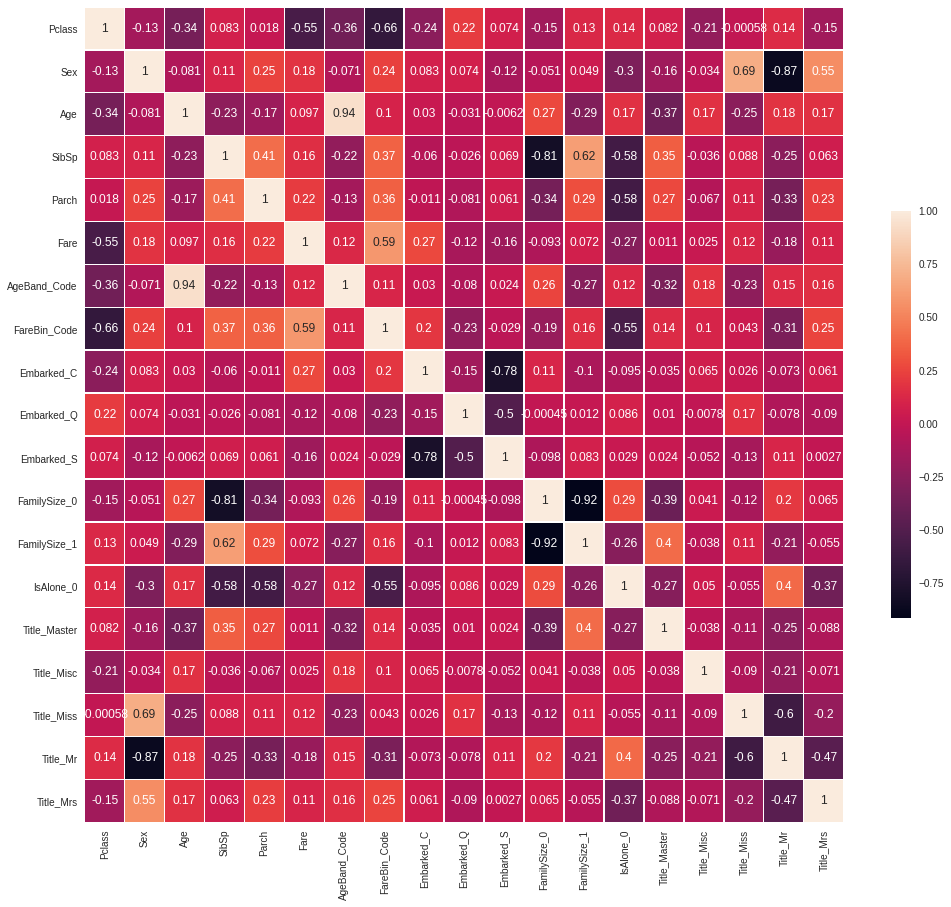

In [41]:
fig, ax = plt.subplots(figsize=(17, 15))
corr = train_dummy.corr()
sns.heatmap(corr, linewidths=.5, cbar_kws={"shrink": .5},annot_kws={'fontsize':12 },annot=True,)

In [42]:
find_pearson_cor(train_dummy)

Pclass has corr value = -0.33999868128870414 with Age
Pclass has corr value = 0.08308136284568675 with SibSp
Pclass has corr value = 0.018442671310748542 with Parch
Pclass has corr value = -0.5505531056023296 with Fare
Pclass has corr value = -0.3580049812681505 with AgeBand_Code
Pclass has corr value = -0.6606986790061926 with FareBin_Code
Age has corr value = -0.2330663417610274 with SibSp
Age has corr value = -0.17274506911937468 with Parch
Age has corr value = 0.09706415020701051 with Fare
Age has corr value = 0.9389839290158658 with AgeBand_Code
AgeBand_Code Should be dropped with corr =  0.9389839290158658
Age has corr value = 0.0999859214991388 with FareBin_Code
SibSp has corr value = 0.41483769862015607 with Parch
SibSp has corr value = 0.15950564671453715 with Fare
SibSp has corr value = -0.21884575005398088 with AgeBand_Code
SibSp has corr value = 0.36589250273224744 with FareBin_Code
Parch has corr value = 0.21625160259543152 with Fare
Parch has corr value = -0.1340138529583

['AgeBand_Code']

### It is time we make final clean data!!
### I will use 2 dfs, one with only Original Values and one with Coded Values in Bins ( Age,Fare )

In [43]:
clean_data = pd.concat([train_dummy,pd.DataFrame({'Survived':y})],axis=1)
clean_data

Pclass  Sex  Age  SibSp  Parch  Fare  AgeBand_Code  FareBin_Code  \
0         3    0   22      1      0     7             1             0   
1         1    1   38      1      0    71             2             3   
2         3    1   26      0      0     7             1             0   
3         1    1   35      1      0    53             2             3   
4         3    0   35      0      0     8             2             1   
..      ...  ...  ...    ...    ...   ...           ...           ...   
886       2    0   27      0      0    13             1             1   
887       1    1   19      0      0    30             1             2   
888       3    1   28      1      2    23             1             2   
889       1    0   26      0      0    30             1             2   
890       3    0   32      0      0     7             1             0   

     Embarked_C  Embarked_Q  Embarked_S  FamilySize_0  FamilySize_1  \
0             0           0           1             1             0   
1             1           0           0             1             0   
2             0           0           1             1             0   
3             0           0           1             1             0   
4             0           0           1             1             0   
..          ...         ...         ...           ...           ...   
886           0           0           1             1             0   
887           0           0           1             1             0   
888           0           0           1             1             0   
889           1           0           0             1             0   
890           0           1           0             1             0   

     IsAlone_0  Title_Master  Title_Misc  Title_Miss  Title_Mr  Title_Mrs  \
0            0             0           0           0         1          0   
1            0             0           0           0         0          1   
2            1             0           0           1         0          0   
3            0             0           0           0         0          1   
4            1             0           0           0         1          0   
..         ...           ...         ...         ...       ...        ...   
886          1             0           1           0         0          0   
887          1             0           0           1         0          0   
888          0             0           0           1         0          0   
889          1             0           0           0         1          0   
890          1             0           0           0         1          0   

     Survived  
0           0  
1           1  
2           1  
3           1  
4           0  
..        ...  
886         0  
887         1  
888         0  
889         1  
890         0  

[891 rows x 20 columns]

In [44]:
# In here we keep only Original Values encoded
train_calc = ['Pclass','Sex','SibSp', 'Parch', 'Age', 'Fare', 'Embarked_C', 'Embarked_Q','Embarked_S', 'Title_Master','Title_Misc','Title_Miss', 'Title_Mr','Title_Mrs'] 


# In this We keep all the featured values and remove correlated values as seen above in pearson corr heatmap
train_feat = ['Sex','Pclass', 'Embarked_C', 'Embarked_Q','Embarked_S','FamilySize_0','FamilySize_1','IsAlone_0', 'Title_Master','Title_Misc','Title_Miss', 'Title_Mr','Title_Mrs', 'FamilySize_0','FamilySize_1', 'AgeBand_Code', 'FareBin_Code']
#define x variables for original w/bin features to remove continuous variables

train_calc_df = clean_data[train_calc+['Survived']]
test_calc_df = test_dummy[train_calc]
train_calc_df

Pclass  Sex  SibSp  Parch  Age  Fare  Embarked_C  Embarked_Q  Embarked_S  \
0         3    0      1      0   22     7           0           0           1   
1         1    1      1      0   38    71           1           0           0   
2         3    1      0      0   26     7           0           0           1   
3         1    1      1      0   35    53           0           0           1   
4         3    0      0      0   35     8           0           0           1   
..      ...  ...    ...    ...  ...   ...         ...         ...         ...   
886       2    0      0      0   27    13           0           0           1   
887       1    1      0      0   19    30           0           0           1   
888       3    1      1      2   28    23           0           0           1   
889       1    0      0      0   26    30           1           0           0   
890       3    0      0      0   32     7           0           1           0   

     Title_Master  Title_Misc  Title_Miss  Title_Mr  Title_Mrs  Survived  
0               0           0           0         1          0         0  
1               0           0           0         0          1         1  
2               0           0           1         0          0         1  
3               0           0           0         0          1         1  
4               0           0           0         1          0         0  
..            ...         ...         ...       ...        ...       ...  
886             0           1           0         0          0         0  
887             0           0           1         0          0         1  
888             0           0           1         0          0         0  
889             0           0           0         1          0         1  
890             0           0           0         1          0         0  

[891 rows x 15 columns]

In [45]:
clean_feat_df = clean_data[train_feat+['Survived']]
clean_feat_df

Sex  Pclass  Embarked_C  Embarked_Q  Embarked_S  FamilySize_0  \
0      0       3           0           0           1             1   
1      1       1           1           0           0             1   
2      1       3           0           0           1             1   
3      1       1           0           0           1             1   
4      0       3           0           0           1             1   
..   ...     ...         ...         ...         ...           ...   
886    0       2           0           0           1             1   
887    1       1           0           0           1             1   
888    1       3           0           0           1             1   
889    0       1           1           0           0             1   
890    0       3           0           1           0             1   

     FamilySize_1  IsAlone_0  Title_Master  Title_Misc  Title_Miss  Title_Mr  \
0               0          0             0           0           0         1   
1               0          0             0           0           0         0   
2               0          1             0           0           1         0   
3               0          0             0           0           0         0   
4               0          1             0           0           0         1   
..            ...        ...           ...         ...         ...       ...   
886             0          1             0           1           0         0   
887             0          1             0           0           1         0   
888             0          0             0           0           1         0   
889             0          1             0           0           0         1   
890             0          1             0           0           0         1   

     Title_Mrs  FamilySize_0  FamilySize_1  AgeBand_Code  FareBin_Code  \
0            0             1             0             1             0   
1            1             1             0             2             3   
2            0             1             0             1             0   
3            1             1             0             2             3   
4            0             1             0             2             1   
..         ...           ...           ...           ...           ...   
886          0             1             0             1             1   
887          0             1             0             1             2   
888          0             1             0             1             2   
889          0             1             0             1             2   
890          0             1             0             1             0   

     Survived  
0           0  
1           1  
2           1  
3           1  
4           0  
..        ...  
886         0  
887         1  
888         0  
889         1  
890         0  

[891 rows x 18 columns]

In [46]:
clean_feat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Sex           891 non-null    int64
 1   Pclass        891 non-null    int64
 2   Embarked_C    891 non-null    int64
 3   Embarked_Q    891 non-null    int64
 4   Embarked_S    891 non-null    int64
 5   FamilySize_0  891 non-null    int64
 6   FamilySize_1  891 non-null    int64
 7   IsAlone_0     891 non-null    int64
 8   Title_Master  891 non-null    int64
 9   Title_Misc    891 non-null    int64
 10  Title_Miss    891 non-null    int64
 11  Title_Mr      891 non-null    int64
 12  Title_Mrs     891 non-null    int64
 13  FamilySize_0  891 non-null    int64
 14  FamilySize_1  891 non-null    int64
 15  AgeBand_Code  891 non-null    int64
 16  FareBin_Code  891 non-null    int64
 17  Survived      891 non-null    int64
dtypes: int64(18)
memory usage: 125.4 KB


# Machine Learning

In [47]:
X_final = train_calc_df.drop(['Survived'],axis=1).values # for original features

X_final_feat = clean_feat_df.drop(['Survived'],axis=1).values # for new features

target = train_calc_df['Survived'].values

In [48]:
X_final.shape

(891, 14)

**It is always a good Idea to Scale the Data**

In [49]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_final = sc.fit_transform(X_final)
print(X_final.shape,X_final)

sc_feat = StandardScaler()
X_final_feat = sc_feat.fit_transform(X_final_feat)
print(X_final_feat.shape,X_final_feat)

(891, 14) [[ 0.82737724 -0.73769513  0.43279337 ... -0.50665528  0.85053175
  -0.4039621 ]
 [-1.56610693  1.35557354  0.43279337 ... -0.50665528 -1.17573506
   2.47547975]
 [ 0.82737724  1.35557354 -0.4745452  ...  1.97372855 -1.17573506
  -0.4039621 ]
 ...
 [ 0.82737724  1.35557354  0.43279337 ...  1.97372855 -1.17573506
  -0.4039621 ]
 [-1.56610693 -0.73769513 -0.4745452  ... -0.50665528  0.85053175
  -0.4039621 ]
 [ 0.82737724 -0.73769513 -0.4745452  ... -0.50665528  0.85053175
  -0.4039621 ]]
(891, 17) [[-0.73769513  0.82737724 -0.48204268 ... -0.21395011 -0.35540454
  -1.2935701 ]
 [ 1.35557354 -1.56610693  2.0745051  ... -0.21395011  0.87675673
   1.37647846]
 [ 1.35557354  0.82737724 -0.48204268 ... -0.21395011 -0.35540454
  -1.2935701 ]
 ...
 [ 1.35557354  0.82737724 -0.48204268 ... -0.21395011 -0.35540454
   0.48646227]
 [-0.73769513 -1.56610693  2.0745051  ... -0.21395011 -0.35540454
   0.48646227]
 [-0.73769513  0.82737724 -0.48204268 ... -0.21395011 -0.35540454
  -1.2935701

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_final, target, test_size=0.10)
print(X_train.shape, X_test.shape)

(801, 14) (90, 14)


In [51]:
X_train_feat, X_test_feat, y_train_feat, y_test_feat = train_test_split(X_final_feat, target, test_size=0.10)
print(X_train_feat.shape, X_test_feat.shape)

(801, 17) (90, 17)


In [52]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_final, target)
acc_log = round(logreg.score(X_final, target) * 100, 2)
acc_log

82.94

In [53]:
coeff_df = pd.DataFrame(train_calc_df.columns.delete(-1))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

Feature  Correlation
1            Sex     1.295346
9   Title_Master     0.615229
5           Fare     0.176105
13     Title_Mrs     0.159327
6     Embarked_C     0.084926
7     Embarked_Q     0.028669
10    Title_Misc    -0.064380
8     Embarked_S    -0.092440
11    Title_Miss    -0.109077
12      Title_Mr    -0.258787
3          Parch    -0.278679
4            Age    -0.316850
2          SibSp    -0.588474
0         Pclass    -0.869466

In [54]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_final, target)

acc_decision_tree = round(decision_tree.score(X_final, target) * 100, 2)
acc_decision_tree

96.41

In [55]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_final_feat, target)
acc_log = round(logreg.score(X_final_feat, target) * 100, 2)
acc_log

81.71

In [56]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_final_feat, target)

acc_decision_tree = round(decision_tree.score(X_final_feat, target) * 100, 2)
acc_decision_tree

87.88

> Pretty Clear that Decision Tree Shined Like a Charm!! 
**[Tho this is training Accuracy, so it could be overfitting!!]**

Also, Original Features give better performance on training set as opposed to Engineered ones in this case!!

In [57]:
# Let's create a clean predict method 
def predict_custom(classifier,x_test,y_test):
    
    predictions = classifier.predict(x_test)
    
    # get f1score,prec,recall,roc_auc, and accuracy
    f1 = f1_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    roc_auc = roc_auc_score(y_test, predictions)
    accuracy = accuracy_score(y_test, predictions)
    
    result_df = pd.DataFrame({'f1':[f1],'Precision':[precision],'Recall':[recall],'roc_auc_score':[roc_auc],'Accuracy':[accuracy]})
    
    print("\n\n#---------------- Test set results (Best Classifier) ----------------#\n")
    print("F1 score, Precision, Recall, ROC_AUC score, Accuracy:")
    return result_df

## Lets' do Cross Validation and GridSearchCV

In [58]:
# Let's implement simple classifiers

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "XGB":XGBClassifier()   
}

In [59]:
# Wow our scores are getting even high scores even when applying cross validation.
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    
    # scoring on final
    classifier.fit(X_final, target)
    
    training_score = cross_val_score(classifier, X_final, target, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")
    print('-'*50)
    print('\n')
    
for key, classifier in classifiers.items(): 
    # scoring on splitted data!!1
    print("Scoring on",key)
    classifier.fit(X_train, y_train)
    print(predict_custom(classifier,X_test,y_test))
    print('-'*50)
    print('\n')


Classifiers:  LogisticRegression Has a training score of 83.0 % accuracy score
--------------------------------------------------


Classifiers:  KNeighborsClassifier Has a training score of 81.0 % accuracy score
--------------------------------------------------


Classifiers:  SVC Has a training score of 82.0 % accuracy score
--------------------------------------------------


Classifiers:  RandomForestClassifier Has a training score of 80.0 % accuracy score
--------------------------------------------------


Classifiers:  GradientBoostingClassifier Has a training score of 82.0 % accuracy score
--------------------------------------------------


Classifiers:  DecisionTreeClassifier Has a training score of 79.0 % accuracy score
--------------------------------------------------


Classifiers:  XGBClassifier Has a training score of 82.0 % accuracy score
--------------------------------------------------


Scoring on LogisiticRegression


#---------------- Test set results (Best Clas

In [60]:
# Wow our scores are getting even high scores even when applying cross validation.
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    
    # scoring on final
    classifier.fit(X_final_feat, target)
    
    training_score = cross_val_score(classifier, X_final_feat, target, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")
    print('-'*50)
    print('\n')
    
for key, classifier in classifiers.items(): 
    # scoring on splitted data!!1
    print("Scoring on",key)
    classifier.fit(X_train_feat, y_train_feat)
    print(predict_custom(classifier,X_test_feat,y_test_feat))
    print('-'*50)
    print('\n')


Classifiers:  LogisticRegression Has a training score of 81.0 % accuracy score
--------------------------------------------------


Classifiers:  KNeighborsClassifier Has a training score of 83.0 % accuracy score
--------------------------------------------------


Classifiers:  SVC Has a training score of 81.0 % accuracy score
--------------------------------------------------


Classifiers:  RandomForestClassifier Has a training score of 82.0 % accuracy score
--------------------------------------------------


Classifiers:  GradientBoostingClassifier Has a training score of 82.0 % accuracy score
--------------------------------------------------


Classifiers:  DecisionTreeClassifier Has a training score of 81.0 % accuracy score
--------------------------------------------------


Classifiers:  XGBClassifier Has a training score of 83.0 % accuracy score
--------------------------------------------------


Scoring on LogisiticRegression


#---------------- Test set results (Best Clas

In [61]:
# Best models are XGBoost, Logistic,RandomForest,GradientBoosting

# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV


# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'],
                  'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params,cv=5)
grid_log_reg.fit(X_final, target)
log_reg = grid_log_reg.best_estimator_
print(log_reg)

#XGBoost
xgboost_params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

grid_xgboost = GridSearchCV(XGBClassifier(), xgboost_params,cv=5)
grid_xgboost.fit(X_final, target)
xgboost_clf = grid_xgboost.best_estimator_
print(xgboost_clf)


# # Gradient Boosting Classifier

# grad_boost_parameters = {
#     "loss":["deviance"],
#     "learning_rate": [0.05, 0.1,  0.5],
#     "min_samples_split": np.linspace(0.5, 12),
#     "min_samples_leaf": np.linspace(0.5, 12),
#     "max_depth":[3,5,8],
#     "max_features":["log2","sqrt"],
#     "subsample":[0.5, 0.8, 1.0],
#     "n_estimators":[10,50,100]
#     }

# grid_gradBoost = GridSearchCV(GradientBoostingClassifier(), grad_boost_parameters,cv=5)
# grid_gradBoost.fit(X_final, target)
# grad_boost = grid_gradBoost.best_estimator_
# print(grad_boost)

# Random Forest Classifier
randF_params = { 
    'n_estimators': [50,100,200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,6,8],
    'criterion' :['gini', 'entropy']
}

grid_tree = GridSearchCV(RandomForestClassifier(), randF_params,cv=5)
grid_tree.fit(X_final, target)

# tree best estimator
RandF_clf = grid_tree.best_estimator_
print(RandF_clf)

LogisticRegression(C=1)
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=1.5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.6,
              tree_method='exact', validate_parameters=1, verbosity=None)
RandomForestClassifier(criterion='entropy', max_depth=6, max_features='log2',
                       n_estimators=200)


In [62]:
log_reg_score = cross_val_score(log_reg, X_final, target, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')


xgboost_score = cross_val_score(xgboost_clf, X_final, target, cv=5)
print('XGBoost Cross Validation Score', round(xgboost_score.mean() * 100, 2).astype(str) + '%')

# grad_boost_score = cross_val_score(grad_boost, X_final, target, cv=5)
# print('GradientBoostingClassifier Cross Validation Score', round(grad_boost_score.mean() * 100, 2).astype(str) + '%')

randF_score = cross_val_score(RandF_clf,X_final, target, cv=5)
print('Random Forest Classifier Cross Validation Score', round(randF_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  82.72%
XGBoost Cross Validation Score 84.85%
Random Forest Classifier Cross Validation Score 82.15%


# We can use Log_reg or XGBoost for our Submission

In [63]:
Y_pred = log_reg.predict(test_calc_df.values)
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [64]:
submission = pd.DataFrame({
        "PassengerId": pd.read_csv('../input/titanic/test.csv')["PassengerId"],
        "Survived": Y_pred
    })

submission

PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         0
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]

In [65]:
submission.to_csv('../working/submission.csv', index=False)

## This was a basic yet Informative DS Framework to work with any ML data.


#### Please visit my website wherein I am doing 100 Projects in Deep Learning.
---
### [AI Unquote](https://www.aiunquote.com)
### Follow me on LinkedIn where I post DS related Stuff everyday!!  [Alaap Dhall](https://www.linkedin.com/in/alaapdhall/)
***

<br>

**Thank you**